# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras

2022-09-09 19:54:35.429562: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


# training data set

In [2]:
traindata = pd.read_table('train_FD001.txt',sep=' ',header=None)
traindata.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


In [3]:
traindata.shape

(20631, 28)

# RUL 

In [4]:
rul_given = pd.read_table('RUL_FD001.txt',sep=' ',header=None)
rul_given.head()

,0,1
0,112,NaN
1,98,NaN
2,69,NaN
3,82,NaN
4,91,NaN


# data pre-processing 

In [5]:
def preproc(df,key):
    
    # data preprocessing
    sensordata = df.drop([0,1,2,3,4,26,27],axis=1)
    cols = range(1,22)
    sensordata.columns = cols
    X = sensordata.drop([1,5,6,10,16,18,19],axis=1)
    
    # RUL creation
    g = df.groupby([0])
    d = (g.last()).sort_index().reset_index().drop_duplicates()
    d.drop(d.columns.difference([1]),axis=1,inplace=True)
    RUL_set = 115
    RUL = []
    
    if(key=='test'):
        rul_given = pd.read_table('RUL_FD001.txt',sep=' ',header=None)
        d[1] = d[1]+rul_given[0]
    
    for row in range(df.shape[0]):
        i = df[0][row] - 1
        if df[1][row] <= (d[1][i] - RUL_set):
            RUL.append(RUL_set)
        else:
            RUL.append(d[1][i] - df[1][row])
    RUL = np.asarray(RUL)  
    
    return X, RUL

In [6]:
X_train, Y_train = preproc(traindata,'train')
X_train.head()

,2,3,4,7,8,9,11,12,13,14,15,17,20,21
0,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
2,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442
3,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739
4,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044


In [7]:
Y_train

array([115, 115, 115, ...,   2,   1,   0])

In [8]:
print("X_train shape: ",X_train.shape)
print("Y_train shape: ",Y_train.shape)

X_train shape:  (20631, 14)
Y_train shape:  (20631,)


# test data

In [9]:
testdata = pd.read_table('test_FD001.txt',sep=' ',header=None)
testdata.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,NaN,NaN
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,NaN,NaN
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,NaN,NaN
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,NaN,NaN
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,NaN,NaN


In [10]:
testdata.shape

(13096, 28)

In [11]:
X_test, Y_test = preproc(testdata,'test')
X_test.head()

,2,3,4,7,8,9,11,12,13,14,15,17,20,21
0,643.02,1585.29,1398.21,553.90,2388.04,9050.17,47.20,521.72,2388.03,8125.55,8.4052,392,38.86,23.3735
1,641.71,1588.45,1395.42,554.85,2388.01,9054.42,47.50,522.16,2388.06,8139.62,8.3803,393,39.02,23.3916
2,642.46,1586.94,1401.34,554.11,2388.05,9056.96,47.50,521.97,2388.03,8130.10,8.4441,393,39.08,23.4166
3,642.44,1584.12,1406.42,554.07,2388.03,9045.29,47.28,521.38,2388.05,8132.90,8.3917,391,39.00,23.3737
4,642.51,1587.19,1401.92,554.16,2388.01,9044.55,47.31,522.15,2388.03,8129.54,8.4031,390,38.99,23.4130


In [12]:
Y_test

array([115, 115, 115, ...,  22,  21,  20])

In [13]:
print("X_test shape: ",X_test.shape)
print("Y_test shape: ",Y_test.shape)

X_test shape:  (13096, 14)
Y_test shape:  (13096,)


# Plotting piecewise function

Text(0.5, 1.0, 'Training turbine 1')

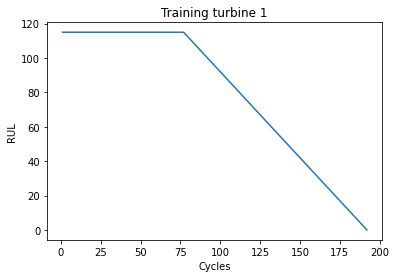

In [14]:
#on y_train

plt.plot(range(1,193),Y_train[0:192])
plt.xlabel('Cycles')
plt.ylabel('RUL')
plt.title('Training turbine 1')

Text(0.5, 1.0, 'Testing turbine 1')

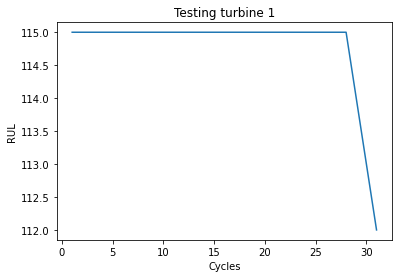

In [15]:
#on y_test

plt.plot(range(1,32),Y_test[0:31])
plt.xlabel('Cycles')
plt.ylabel('RUL')
plt.title('Testing turbine 1')

In [16]:
#X1, y1 = shuffle(X_train,Y_train, random_state=23)
X1, y1 = X_train, Y_train

In [17]:
from sklearn.preprocessing import MinMaxScaler
normaliser = MinMaxScaler(feature_range = (-1,1))
X1 = normaliser.fit_transform(X1)
X_test = normaliser.transform(X_test)

In [18]:
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers import Dense, Dropout, Conv1D, Flatten

def crt_model(activation):
    model = Sequential()
    model.add(Dense(650,input_dim=14, activation=activation,  kernel_initializer='glorot_uniform', kernel_regularizer='l2'))
    model.add(Dropout(0.5))
    model.add(Dense(650, activation=activation, kernel_initializer='glorot_uniform', kernel_regularizer='l2'))
    model.add(Dropout(0.5))
    model.add(Dense(450, activation=activation, kernel_initializer='glorot_uniform', kernel_regularizer='l2'))
    model.add(Dropout(0.5))
    model.add(Dense(350, activation=activation, kernel_initializer='glorot_uniform', kernel_regularizer='l2'))
    model.add(Dropout(0.5))
    model.add(Dense(250, activation=activation, kernel_initializer='glorot_uniform', kernel_regularizer='l2'))
    model.add(Dropout(0.5))
    model.add(Dense(150, activation=activation, kernel_initializer='glorot_uniform', kernel_regularizer='l2'))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=[keras.metrics.RootMeanSquaredError()])
    return model

In [19]:
reg = KerasRegressor(build_fn=crt_model, verbose=1, epochs=1000, activation='tanh', batch_size=512)

/tmp/ipykernel_164865/4229964528.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  reg = KerasRegressor(build_fn=crt_model, verbose=1, epochs=1000, activation='tanh', batch_size=512)


In [20]:
history = reg.fit(X1, y1)

Epoch 1/1000


2022-09-09 19:54:39.930474: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1922] Ignoring visible gpu device (device: 1, name: Quadro P1000, pci bus id: 0000:99:00.0, compute capability: 6.1) with core count: 5. The minimum required count is 8. You can adjust this requirement with the env var TF_MIN_GPU_MULTIPROCESSOR_COUNT.
2022-09-09 19:54:39.931101: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-09 19:54:40.560931: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 230 MB memory:  -> device: 0, name: Quadro GV100, pci bus id: 0000:2d:00.0, compute capability: 7.0


41/41 [==============================] - 1s 8ms/step - loss: 6164.7832 - root_mean_squared_error: 78.3804
Epoch 2/1000
41/41 [==============================] - 0s 8ms/step - loss: 5108.9097 - root_mean_squared_error: 71.3270
Epoch 3/1000
41/41 [==============================] - 0s 8ms/step - loss: 4418.0000 - root_mean_squared_error: 66.3104
Epoch 4/1000
41/41 [==============================] - 0s 8ms/step - loss: 3841.2354 - root_mean_squared_error: 61.8131
Epoch 5/1000
41/41 [==============================] - 0s 8ms/step - loss: 3361.9041 - root_mean_squared_error: 57.8112
Epoch 6/1000
41/41 [==============================] - 0s 7ms/step - loss: 2973.3779 - root_mean_squared_error: 54.3531
Epoch 7/1000
41/41 [==============================] - 0s 7ms/step - loss: 2641.3950 - root_mean_squared_error: 51.2148
Epoch 8/1000
41/41 [==============================] - 0s 7ms/step - loss: 2377.9436 - root_mean_squared_error: 48.5818
Epoch 9/1000
41/41 [==============================] - 0s 7ms/

41/41 [==============================] - 0s 8ms/step - loss: 354.9337 - root_mean_squared_error: 18.3486
Epoch 70/1000
41/41 [==============================] - 0s 8ms/step - loss: 358.7260 - root_mean_squared_error: 18.4530
Epoch 71/1000
41/41 [==============================] - 0s 8ms/step - loss: 360.0747 - root_mean_squared_error: 18.4871
Epoch 72/1000
41/41 [==============================] - 0s 9ms/step - loss: 355.1765 - root_mean_squared_error: 18.3505
Epoch 73/1000
41/41 [==============================] - 0s 8ms/step - loss: 354.8173 - root_mean_squared_error: 18.3423
Epoch 74/1000
41/41 [==============================] - 0s 8ms/step - loss: 355.4984 - root_mean_squared_error: 18.3589
Epoch 75/1000
41/41 [==============================] - 0s 8ms/step - loss: 360.3829 - root_mean_squared_error: 18.4886
Epoch 76/1000
41/41 [==============================] - 0s 8ms/step - loss: 359.4944 - root_mean_squared_error: 18.4658
Epoch 77/1000
41/41 [==============================] - 0s 9ms/

41/41 [==============================] - 0s 8ms/step - loss: 354.6071 - root_mean_squared_error: 18.3503
Epoch 138/1000
41/41 [==============================] - 0s 8ms/step - loss: 350.0246 - root_mean_squared_error: 18.2265
Epoch 139/1000
41/41 [==============================] - 0s 8ms/step - loss: 352.3499 - root_mean_squared_error: 18.2922
Epoch 140/1000
41/41 [==============================] - 0s 8ms/step - loss: 352.6821 - root_mean_squared_error: 18.3033
Epoch 141/1000
41/41 [==============================] - 0s 8ms/step - loss: 353.4032 - root_mean_squared_error: 18.3239
Epoch 142/1000
41/41 [==============================] - 0s 8ms/step - loss: 355.2174 - root_mean_squared_error: 18.3754
Epoch 143/1000
41/41 [==============================] - 0s 8ms/step - loss: 351.5105 - root_mean_squared_error: 18.2749
Epoch 144/1000
41/41 [==============================] - 0s 8ms/step - loss: 352.5307 - root_mean_squared_error: 18.3044
Epoch 145/1000
41/41 [==============================] -

41/41 [==============================] - 0s 7ms/step - loss: 348.7945 - root_mean_squared_error: 18.2253
Epoch 206/1000
41/41 [==============================] - 0s 7ms/step - loss: 345.7457 - root_mean_squared_error: 18.1415
Epoch 207/1000
41/41 [==============================] - 0s 7ms/step - loss: 346.1525 - root_mean_squared_error: 18.1534
Epoch 208/1000
41/41 [==============================] - 0s 7ms/step - loss: 348.6889 - root_mean_squared_error: 18.2242
Epoch 209/1000
41/41 [==============================] - 0s 7ms/step - loss: 352.8127 - root_mean_squared_error: 18.3373
Epoch 210/1000
41/41 [==============================] - 0s 8ms/step - loss: 353.1000 - root_mean_squared_error: 18.3461
Epoch 211/1000
41/41 [==============================] - 0s 8ms/step - loss: 350.5450 - root_mean_squared_error: 18.2764
Epoch 212/1000
41/41 [==============================] - 0s 8ms/step - loss: 348.5682 - root_mean_squared_error: 18.2225
Epoch 213/1000
41/41 [==============================] -

41/41 [==============================] - 0s 7ms/step - loss: 344.6649 - root_mean_squared_error: 18.1295
Epoch 274/1000
41/41 [==============================] - 0s 7ms/step - loss: 346.1002 - root_mean_squared_error: 18.1682
Epoch 275/1000
41/41 [==============================] - 0s 7ms/step - loss: 348.4071 - root_mean_squared_error: 18.2312
Epoch 276/1000
41/41 [==============================] - 0s 7ms/step - loss: 347.2726 - root_mean_squared_error: 18.1997
Epoch 277/1000
41/41 [==============================] - 0s 7ms/step - loss: 348.9791 - root_mean_squared_error: 18.2479
Epoch 278/1000
41/41 [==============================] - 0s 8ms/step - loss: 342.1430 - root_mean_squared_error: 18.0596
Epoch 279/1000
41/41 [==============================] - 0s 7ms/step - loss: 343.8692 - root_mean_squared_error: 18.1066
Epoch 280/1000
41/41 [==============================] - 0s 7ms/step - loss: 347.1825 - root_mean_squared_error: 18.1982
Epoch 281/1000
41/41 [==============================] -

41/41 [==============================] - 0s 7ms/step - loss: 339.2583 - root_mean_squared_error: 17.9907
Epoch 342/1000
41/41 [==============================] - 0s 7ms/step - loss: 340.6361 - root_mean_squared_error: 18.0302
Epoch 343/1000
41/41 [==============================] - 0s 8ms/step - loss: 340.7113 - root_mean_squared_error: 18.0318
Epoch 344/1000
41/41 [==============================] - 0s 8ms/step - loss: 343.2451 - root_mean_squared_error: 18.1018
Epoch 345/1000
41/41 [==============================] - 0s 8ms/step - loss: 342.4344 - root_mean_squared_error: 18.0789
Epoch 346/1000
41/41 [==============================] - 0s 8ms/step - loss: 336.6266 - root_mean_squared_error: 17.9181
Epoch 347/1000
41/41 [==============================] - 0s 8ms/step - loss: 342.4353 - root_mean_squared_error: 18.0792
Epoch 348/1000
41/41 [==============================] - 0s 8ms/step - loss: 338.4956 - root_mean_squared_error: 17.9694
Epoch 349/1000
41/41 [==============================] -

41/41 [==============================] - 0s 8ms/step - loss: 336.6458 - root_mean_squared_error: 17.9181
Epoch 410/1000
41/41 [==============================] - 0s 8ms/step - loss: 342.0611 - root_mean_squared_error: 18.0683
Epoch 411/1000
41/41 [==============================] - 0s 8ms/step - loss: 342.4965 - root_mean_squared_error: 18.0815
Epoch 412/1000
41/41 [==============================] - 0s 8ms/step - loss: 340.4341 - root_mean_squared_error: 18.0244
Epoch 413/1000
41/41 [==============================] - 0s 8ms/step - loss: 337.4624 - root_mean_squared_error: 17.9411
Epoch 414/1000
41/41 [==============================] - 0s 8ms/step - loss: 338.1169 - root_mean_squared_error: 17.9591
Epoch 415/1000
41/41 [==============================] - 0s 8ms/step - loss: 339.7667 - root_mean_squared_error: 18.0036
Epoch 416/1000
41/41 [==============================] - 0s 8ms/step - loss: 342.6371 - root_mean_squared_error: 18.0839
Epoch 417/1000
41/41 [==============================] -

41/41 [==============================] - 0s 7ms/step - loss: 333.3814 - root_mean_squared_error: 17.8293
Epoch 478/1000
41/41 [==============================] - 0s 7ms/step - loss: 338.5662 - root_mean_squared_error: 17.9732
Epoch 479/1000
41/41 [==============================] - 0s 7ms/step - loss: 337.8462 - root_mean_squared_error: 17.9544
Epoch 480/1000
41/41 [==============================] - 0s 7ms/step - loss: 335.6997 - root_mean_squared_error: 17.8949
Epoch 481/1000
41/41 [==============================] - 0s 7ms/step - loss: 338.0059 - root_mean_squared_error: 17.9588
Epoch 482/1000
41/41 [==============================] - 0s 8ms/step - loss: 338.3787 - root_mean_squared_error: 17.9678
Epoch 483/1000
41/41 [==============================] - 0s 8ms/step - loss: 332.5694 - root_mean_squared_error: 17.8042
Epoch 484/1000
41/41 [==============================] - 0s 7ms/step - loss: 340.8181 - root_mean_squared_error: 18.0335
Epoch 485/1000
41/41 [==============================] -

41/41 [==============================] - 0s 7ms/step - loss: 330.8941 - root_mean_squared_error: 17.7623
Epoch 546/1000
41/41 [==============================] - 0s 7ms/step - loss: 336.7894 - root_mean_squared_error: 17.9278
Epoch 547/1000
41/41 [==============================] - 0s 7ms/step - loss: 336.6448 - root_mean_squared_error: 17.9237
Epoch 548/1000
41/41 [==============================] - 0s 7ms/step - loss: 334.5430 - root_mean_squared_error: 17.8653
Epoch 549/1000
41/41 [==============================] - 0s 7ms/step - loss: 336.3649 - root_mean_squared_error: 17.9158
Epoch 550/1000
41/41 [==============================] - 0s 7ms/step - loss: 336.9268 - root_mean_squared_error: 17.9314
Epoch 551/1000
41/41 [==============================] - 0s 7ms/step - loss: 338.4433 - root_mean_squared_error: 17.9736
Epoch 552/1000
41/41 [==============================] - 0s 7ms/step - loss: 332.7973 - root_mean_squared_error: 17.8160
Epoch 553/1000
41/41 [==============================] -

41/41 [==============================] - 0s 7ms/step - loss: 333.9341 - root_mean_squared_error: 17.8469
Epoch 614/1000
41/41 [==============================] - 0s 8ms/step - loss: 328.8233 - root_mean_squared_error: 17.7038
Epoch 615/1000
41/41 [==============================] - 0s 8ms/step - loss: 330.7003 - root_mean_squared_error: 17.7576
Epoch 616/1000
41/41 [==============================] - 0s 8ms/step - loss: 332.7434 - root_mean_squared_error: 17.8141
Epoch 617/1000
41/41 [==============================] - 0s 8ms/step - loss: 333.0528 - root_mean_squared_error: 17.8212
Epoch 618/1000
41/41 [==============================] - 0s 7ms/step - loss: 330.3279 - root_mean_squared_error: 17.7447
Epoch 619/1000
41/41 [==============================] - 0s 7ms/step - loss: 331.8270 - root_mean_squared_error: 17.7875
Epoch 620/1000
41/41 [==============================] - 0s 8ms/step - loss: 328.7312 - root_mean_squared_error: 17.6995
Epoch 621/1000
41/41 [==============================] -

41/41 [==============================] - 0s 8ms/step - loss: 325.4876 - root_mean_squared_error: 17.6057
Epoch 682/1000
41/41 [==============================] - 0s 8ms/step - loss: 326.4777 - root_mean_squared_error: 17.6348
Epoch 683/1000
41/41 [==============================] - 0s 7ms/step - loss: 331.0990 - root_mean_squared_error: 17.7650
Epoch 684/1000
41/41 [==============================] - 0s 8ms/step - loss: 324.3556 - root_mean_squared_error: 17.5736
Epoch 685/1000
41/41 [==============================] - 0s 7ms/step - loss: 329.7531 - root_mean_squared_error: 17.7262
Epoch 686/1000
41/41 [==============================] - 0s 8ms/step - loss: 326.6980 - root_mean_squared_error: 17.6396
Epoch 687/1000
41/41 [==============================] - 0s 7ms/step - loss: 323.1336 - root_mean_squared_error: 17.5388
Epoch 688/1000
41/41 [==============================] - 0s 7ms/step - loss: 330.6269 - root_mean_squared_error: 17.7515
Epoch 689/1000
41/41 [==============================] -

41/41 [==============================] - 0s 8ms/step - loss: 327.6400 - root_mean_squared_error: 17.6717
Epoch 750/1000
41/41 [==============================] - 0s 8ms/step - loss: 326.9959 - root_mean_squared_error: 17.6523
Epoch 751/1000
41/41 [==============================] - 0s 8ms/step - loss: 326.1965 - root_mean_squared_error: 17.6303
Epoch 752/1000
41/41 [==============================] - 0s 7ms/step - loss: 328.5809 - root_mean_squared_error: 17.6964
Epoch 753/1000
41/41 [==============================] - 0s 7ms/step - loss: 329.1379 - root_mean_squared_error: 17.7123
Epoch 754/1000
41/41 [==============================] - 0s 8ms/step - loss: 329.3966 - root_mean_squared_error: 17.7188
Epoch 755/1000
41/41 [==============================] - 0s 8ms/step - loss: 325.1942 - root_mean_squared_error: 17.6003
Epoch 756/1000
41/41 [==============================] - 0s 8ms/step - loss: 329.8609 - root_mean_squared_error: 17.7323
Epoch 757/1000
41/41 [==============================] -

41/41 [==============================] - 0s 7ms/step - loss: 324.1555 - root_mean_squared_error: 17.5732
Epoch 818/1000
41/41 [==============================] - 0s 7ms/step - loss: 322.2521 - root_mean_squared_error: 17.5198
Epoch 819/1000
41/41 [==============================] - 0s 7ms/step - loss: 326.5679 - root_mean_squared_error: 17.6418
Epoch 820/1000
41/41 [==============================] - 0s 7ms/step - loss: 327.0426 - root_mean_squared_error: 17.6556
Epoch 821/1000
41/41 [==============================] - 0s 7ms/step - loss: 326.3929 - root_mean_squared_error: 17.6365
Epoch 822/1000
41/41 [==============================] - 0s 7ms/step - loss: 329.0175 - root_mean_squared_error: 17.7096
Epoch 823/1000
41/41 [==============================] - 0s 8ms/step - loss: 326.5379 - root_mean_squared_error: 17.6396
Epoch 824/1000
41/41 [==============================] - 0s 8ms/step - loss: 323.4968 - root_mean_squared_error: 17.5531
Epoch 825/1000
41/41 [==============================] -

41/41 [==============================] - 0s 8ms/step - loss: 323.6205 - root_mean_squared_error: 17.5541
Epoch 886/1000
41/41 [==============================] - 0s 8ms/step - loss: 324.5549 - root_mean_squared_error: 17.5811
Epoch 887/1000
41/41 [==============================] - 0s 7ms/step - loss: 327.4524 - root_mean_squared_error: 17.6627
Epoch 888/1000
41/41 [==============================] - 0s 7ms/step - loss: 326.2641 - root_mean_squared_error: 17.6284
Epoch 889/1000
41/41 [==============================] - 0s 8ms/step - loss: 321.3324 - root_mean_squared_error: 17.4893
Epoch 890/1000
41/41 [==============================] - 0s 8ms/step - loss: 324.7238 - root_mean_squared_error: 17.5855
Epoch 891/1000
41/41 [==============================] - 0s 8ms/step - loss: 323.0791 - root_mean_squared_error: 17.5394
Epoch 892/1000
41/41 [==============================] - 0s 7ms/step - loss: 321.7617 - root_mean_squared_error: 17.5014
Epoch 893/1000
41/41 [==============================] -

41/41 [==============================] - 0s 8ms/step - loss: 318.0451 - root_mean_squared_error: 17.3940
Epoch 954/1000
41/41 [==============================] - 0s 7ms/step - loss: 318.1559 - root_mean_squared_error: 17.3985
Epoch 955/1000
41/41 [==============================] - 0s 8ms/step - loss: 320.2271 - root_mean_squared_error: 17.4581
Epoch 956/1000
41/41 [==============================] - 0s 7ms/step - loss: 324.5760 - root_mean_squared_error: 17.5819
Epoch 957/1000
41/41 [==============================] - 0s 8ms/step - loss: 320.5980 - root_mean_squared_error: 17.4679
Epoch 958/1000
41/41 [==============================] - 0s 8ms/step - loss: 324.8872 - root_mean_squared_error: 17.5899
Epoch 959/1000
41/41 [==============================] - 0s 8ms/step - loss: 322.9509 - root_mean_squared_error: 17.5364
Epoch 960/1000
41/41 [==============================] - 0s 8ms/step - loss: 321.0029 - root_mean_squared_error: 17.4810
Epoch 961/1000
41/41 [==============================] -

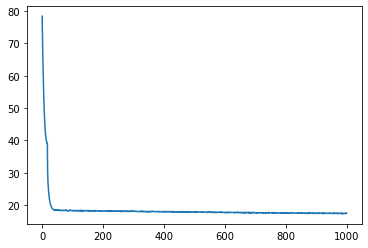

In [21]:
plt.plot(history.history['root_mean_squared_error'])
plt.show()

In [22]:
result = reg.predict(X_test)

26/26 [==============================] - 0s 2ms/step


In [23]:
result = np.ravel(result)

In [24]:
print('RMSE: ',np.sqrt(mean_squared_error(result,Y_test)))

RMSE:  14.24179813202835


In [25]:
def plotfun(testdata, result, Y_test, x, pval):
    g2 = testdata.groupby([0])
    d2 = (g2.last()).sort_index().reset_index().drop_duplicates()
    
    low=0
    for i in range(x):
        if(i==x-1):
            high=d2.iloc[i][1]
        else:
            low+=d2.iloc[i][1]    
    
    if(pval):
        print('Lower Limit: ',low)
        print('Upper Limit: ',low + high)
        print('Cycles:',high)
        
    low = int(low)
    high=int(high)
    
    fig=plt.figure(figsize=[10,5])
    plt.plot(range(1,int(high)+1),Y_test[low:low+high])
    plt.plot(range(1,int(high)+1),result[low:low+high])
    plt.ylim([0,150])
    plt.xlabel('Cycles')
    plt.ylabel('RUL')
    plt.title('Testing turbine ' + str(x))
    plt.legend(['Actual','Predicted'])

Lower Limit:  10388.0
Upper Limit:  10601.0
Cycles: 213.0


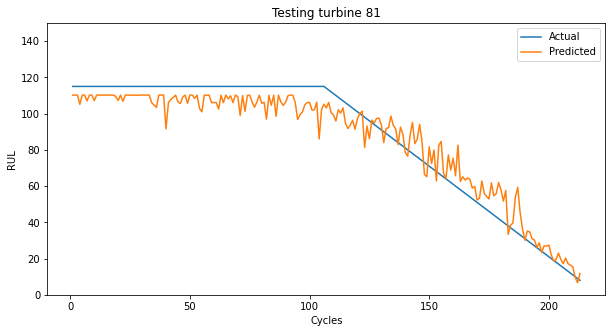

In [26]:
plotfun(testdata, result, Y_test, 81, True)

Text(0.5, 1.0, 'Testing turbine 3 - RUL Deviation')

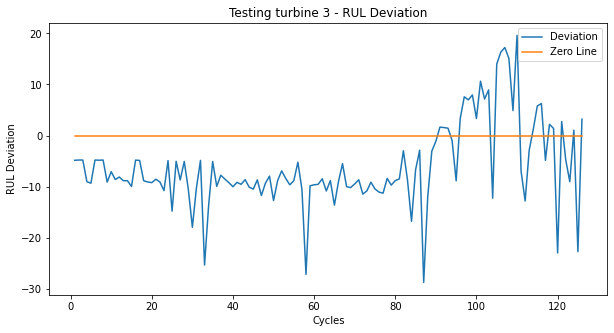

In [27]:
fig=plt.figure(figsize=[10,5])
plt.plot(range(1,127),(result[80:206]-Y_test[80:206]))
plt.plot(range(1,127),np.zeros((126)))
plt.xlabel('Cycles')
plt.ylabel('RUL Deviation')
plt.legend(['Deviation','Zero Line'])
plt.title('Testing turbine 3 - RUL Deviation')